In [93]:
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

import audio_transport as ap
from audio_transport.gen_utils import gen_sinewave, gen_gaussian, normalize
from audio_transport.spec_utils import stft
from audio_transport.plot_utils import plot_spectogram, plot_progression
from audio_transport.transport_utils import compute_optimal_map, compute_optimal_map_lp
from audio_transport.transport_utils import optimal_1d_mapping, interpolate, join_stfts
import cvxpy as cp

import time

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Generating two simulated spectra composed of sums of gaussians

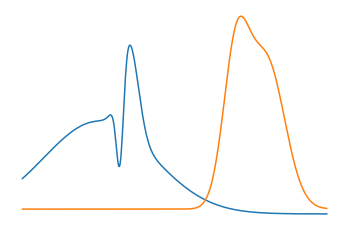

In [177]:
N = 500

mass = lambda x: np.sum(np.abs(x))

t = np.arange(0,N)/N

sigma = .06
a = gen_gaussian(.25,3 * sigma, N) + gen_gaussian(.35, 0.5 * sigma, N) - gen_gaussian(.32, 0.2 * sigma, N) 
b = gen_gaussian(.8,sigma, N) + gen_gaussian(.7,0.7 * sigma, N) 

a = normalize(a)
b = normalize(b)

plt.plot(t, a)
plt.plot(t, b)
plt.axis('off')
plt.show()

Computes the optimal mapping using the greedy algorithm

In [170]:
start_time = time.time()
p = compute_optimal_map(a, b)
print('Execution time: ' + str(time.time() - start_time)  + "seconds")

Execution time: 0.004243135452270508seconds


(-24.950000000000003, 523.95, 0.00031426533834407074, 0.012689220355300238)

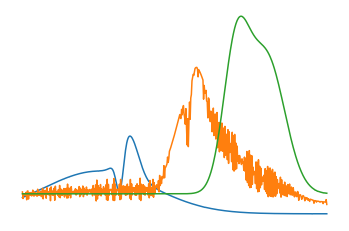

In [179]:
plt.plot(interpolate(a, b, p, 0, mass1=mass(a), mass2=2*mass(b)))
plt.plot(interpolate(a, b, p, 0.6, mass1=mass(a), mass2=2*mass(b)))
plt.plot(interpolate(a, b, p, 1, mass1=mass(a), mass2=2*mass(b)))
plt.axis('off')

Plot optimal mapping p.

(-0.5, 499.5, 499.5, -0.5)

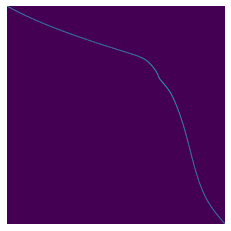

In [157]:
plt.imshow(np.log(p+1e-5))
#plt.imgshow(p)
plt.axis('off')

Displays trivial interpolation and displacement interpolation given the optimal mapping for varying the interpolation parameter t.

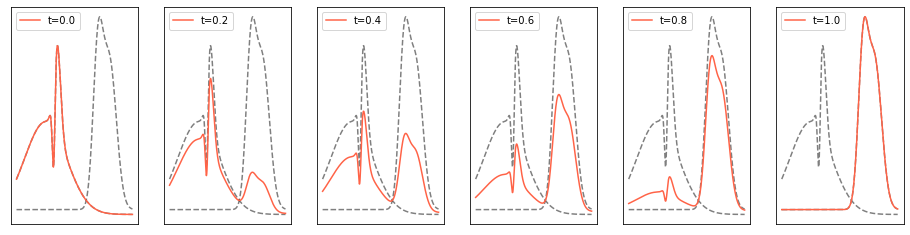

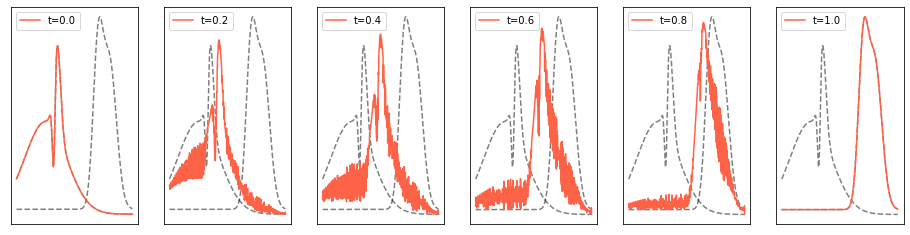

In [158]:
plot_progression(a, b, interp='trivial', figsize=(16,4))
plot_progression(a, b, interp='displacement', mapping=p, figsize=(16,4))

In [98]:
start_time = time.time()
P = compute_optimal_map_lp(a, b, N, N)
print(time.time() - start_time, "seconds")

0.5034971237182617 seconds


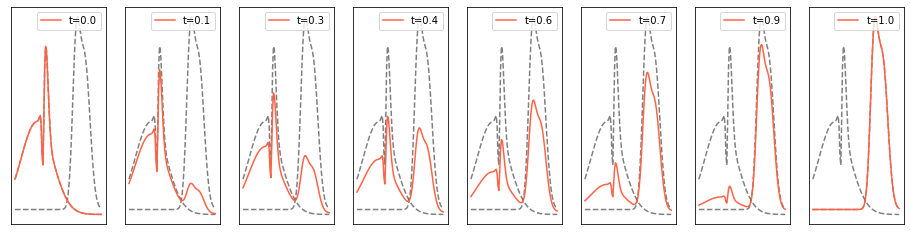

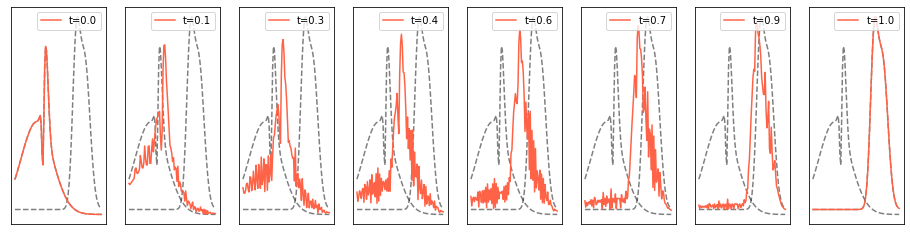

In [99]:
plot_progression(a, b, interp='trivial', figsize=(16,4), size=8)
plot_progression(a, b, interp='displacement', mapping=P, figsize=(16,4), size=8)

(-0.5, 99.5, 99.5, -0.5)

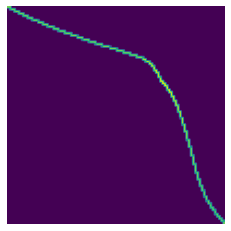

In [100]:
plt.imshow(np.log(P+1e-5))
#plt.imgshow(p)
plt.axis('off')

In [102]:
I,J = np.nonzero(p>1e-5)
Pij = p[I,J]

In [106]:
p.shape

(100, 100)

In [108]:
J

array([ 0,  1,  1,  2,  3,  3,  4,  5,  5,  6,  7,  7,  8,  9,  9, 10, 11,
       11, 12, 13, 14, 14, 15, 16, 16, 17, 18, 18, 19, 20, 21, 21, 22, 23,
       23, 24, 25, 26, 26, 27, 28, 29, 29, 30, 31, 32, 32, 33, 34, 34, 35,
       36, 37, 37, 38, 39, 40, 40, 41, 42, 43, 43, 44, 45, 46, 47, 47, 48,
       49, 50, 50, 51, 52, 53, 53, 54, 55, 56, 56, 57, 58, 59, 59, 60, 61,
       62, 62, 63, 63, 64, 65, 65, 66, 66, 67, 67, 67, 68, 68, 69, 69, 69,
       70, 70, 70, 71, 71, 72, 72, 73, 73, 73, 74, 74, 75, 75, 75, 76, 76,
       76, 77, 77, 77, 78, 78, 78, 78, 79, 79, 79, 79, 80, 80, 80, 80, 81,
       81, 81, 81, 82, 82, 82, 82, 82, 83, 83, 83, 83, 84, 84, 84, 84, 84,
       85, 85, 85, 85, 85, 86, 86, 86, 86, 86, 87, 87, 87, 87, 88, 88, 88,
       88, 89, 89, 89, 90, 90, 90, 90, 91, 91, 91, 92, 92, 93, 93, 93, 94,
       94, 95, 95, 95, 96, 96, 97, 97, 98, 98, 99, 99])